In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def plot_crossover_and_mutation_experiment_2(
    data: pd.DataFrame,
    # y_upper_lim: int,
    crossover_text_y: int,
    color: str,
):
    fig, ax = plt.subplots(figsize=(13, 8))

    sns.boxplot(
        data=data,
        x="crossover_mutation",
        y="nFitnessEvaluations",
        hue="crossover_mutation",
        fill=False,
        gap=0.1,
        ax=ax,
        color=color,
        legend=False,
    )
    # Customize the plot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # ax.axhline(19569, color='black', linestyle='--', alpha=0.5)
    ax.axvline(x=4.5, color="black", linestyle="--", alpha=0.5)
    ax.axvline(x=9.5, color="black", linestyle="--", alpha=0.5)
    ax.axvline(x=14.5, color="black", linestyle="--", alpha=0.5)
    ax.axvline(x=19.5, color="black", linestyle="--", alpha=0.5)

    ax.text(
        2.5,
        crossover_text_y,
        "pc=0.6",
        horizontalalignment="right",
        verticalalignment="top",
    )
    ax.text(
        7.5,
        crossover_text_y,
        "pc=0.7",
        horizontalalignment="right",
        verticalalignment="top",
    )
    ax.text(
        12.5,
        crossover_text_y,
        "pc=0.8",
        horizontalalignment="right",
        verticalalignment="top",
    )
    ax.text(
        17.5,
        crossover_text_y,
        "pc=0.9",
        horizontalalignment="right",
        verticalalignment="top",
    )
    ax.text(
        22.5,
        crossover_text_y,
        "pc=1",
        horizontalalignment="right",
        verticalalignment="top",
    )

    # Add an extra y-tick
    current_yticks = list(ax.get_yticks())
    ax.set_yticks(current_yticks)

    # Optionally, set custom y-tick labels if needed
    current_yticklabels = [
        str(int(ytick)) for ytick in current_yticks
    ]  # Convert current y-ticks to string labels

    ax.set_yticklabels(current_yticklabels)

    # set ylim at 0
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(-100, y_max)
    plt.show()

In [3]:
def generate_all_plots(
    data: pd.DataFrame,
    crossover_text_y: int,
    color: str,
):
    sns.set_context("notebook", font_scale=1.25)
    plt.figure()
    sns.boxplot(
        data=data,
        x="crossoverProb",
        y="nFitnessEvaluations",
        fill=False,
        gap=0.1,
        color=color,
    )

    plt.figure()
    sns.boxplot(
        data=data,
        x="mutationProb",
        y="nFitnessEvaluations",
        fill=False,
        gap=0.1,
        color=color,
    )

    plot_crossover_and_mutation_experiment_2(data, crossover_text_y, color)

# Small problem

In [4]:
data_small = pd.read_csv("./results/s100_results_solution_found.csv")
data_small["crossover_mutation"] = (
    data_small["crossoverProb"].astype(str)
    + "_"
    + data_small["mutationProb"].astype(str)
)

In [5]:
data_small.groupby("crossoverProb").agg(
    {"nFitnessEvaluations": ["mean", "std", "min", "max"]}
)

nFitnessEvaluations                         
                             mean          std  min    max
crossoverProb                                             
0.6                      6564.310  7443.560187  101  57855
0.7                      6477.678  7645.700279  101  66322
0.8                      6834.988  8060.077483  101  81206
0.9                      5939.022  6843.045810  101  63588
1.0                      5608.616  6823.502233  101  78494

In [6]:
data_small.groupby("mutationProb").agg(
    {"nFitnessEvaluations": ["mean", "std", "min", "max"]}
)

nFitnessEvaluations                          
                            mean           std  min    max
mutationProb                                              
0.01                    5939.780   8702.779495  101  81206
0.05                    4108.706   3765.819201  101  22422
0.10                    5526.226   5229.245143  101  27614
0.15                    6361.632   6111.536171  101  35472
0.30                    9488.270  10142.354726  101  78494

/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_320/190913756.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#08D9D6'` for the same effect.

  sns.boxplot(
/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_320/190913756.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


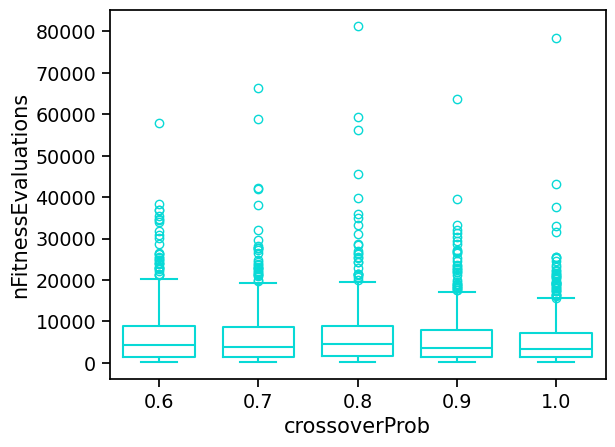

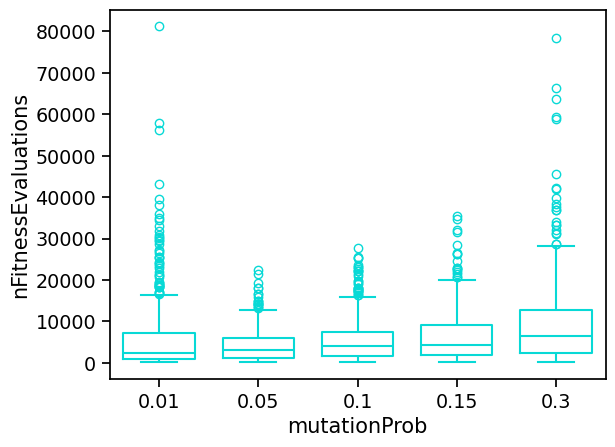

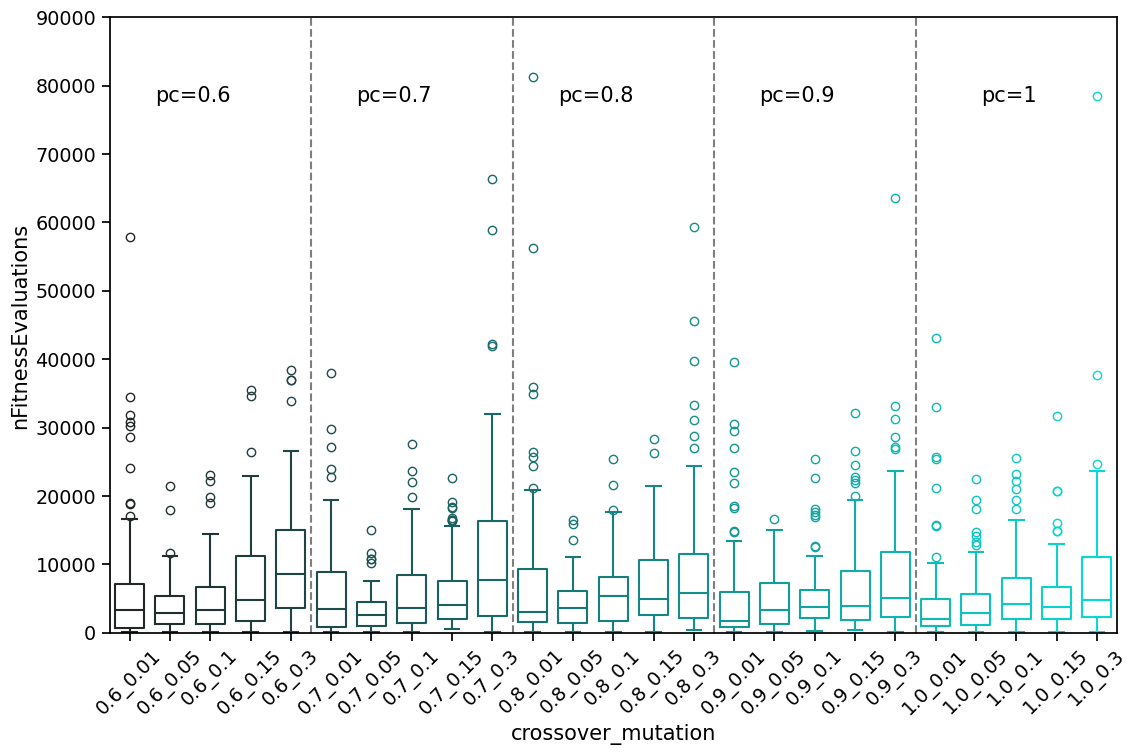

In [7]:
generate_all_plots(data_small, 80000, "#08D9D6")

# Medium problem

In [8]:
data_medium = pd.read_csv("./results/s200_results_solution_found.csv")
data_medium["crossover_mutation"] = (
    data_medium["crossoverProb"].astype(str)
    + "_"
    + data_medium["mutationProb"].astype(str)
)

In [9]:
data_medium.groupby("crossoverProb").agg(
    {"nFitnessEvaluations": ["mean", "std", "min", "max"]}
)

nFitnessEvaluations                         
                             mean          std  min    max
crossoverProb                                             
0.6                      6724.248  7719.331695  102  48314
0.7                      5905.184  6337.541087  101  37990
0.8                      6028.736  6198.423998  101  40517
0.9                      6916.620  7110.382267  152  47470
1.0                      6369.684  6329.097085  101  41581

In [10]:
data_medium.groupby("mutationProb").agg(
    {"nFitnessEvaluations": ["mean", "std", "min", "max"]}
)

nFitnessEvaluations                         
                            mean          std  min    max
mutationProb                                             
0.005                   6101.378  7659.873798  101  41837
0.025                   4999.400  4581.736899  101  28247
0.050                   5902.626  5961.812874  101  40517
0.075                   6624.790  6039.677167  101  41633
0.150                   8316.278  8474.979301  101  48314

/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_320/190913756.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#50B498'` for the same effect.

  sns.boxplot(
/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_320/190913756.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


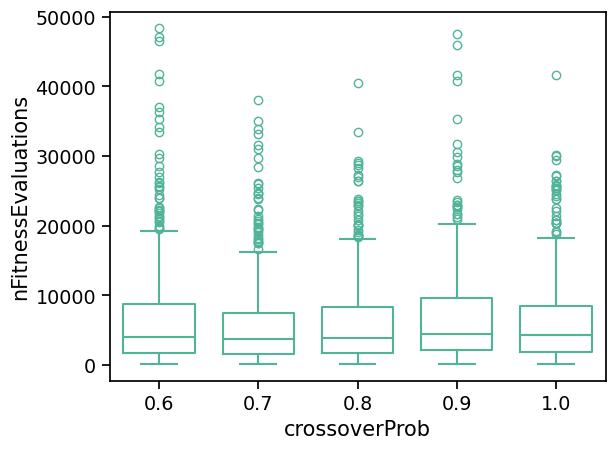

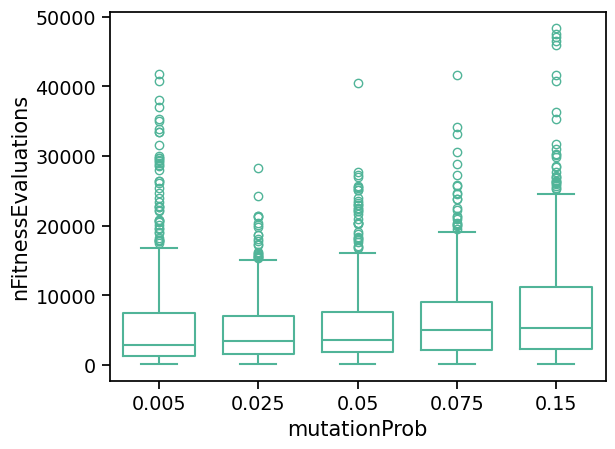

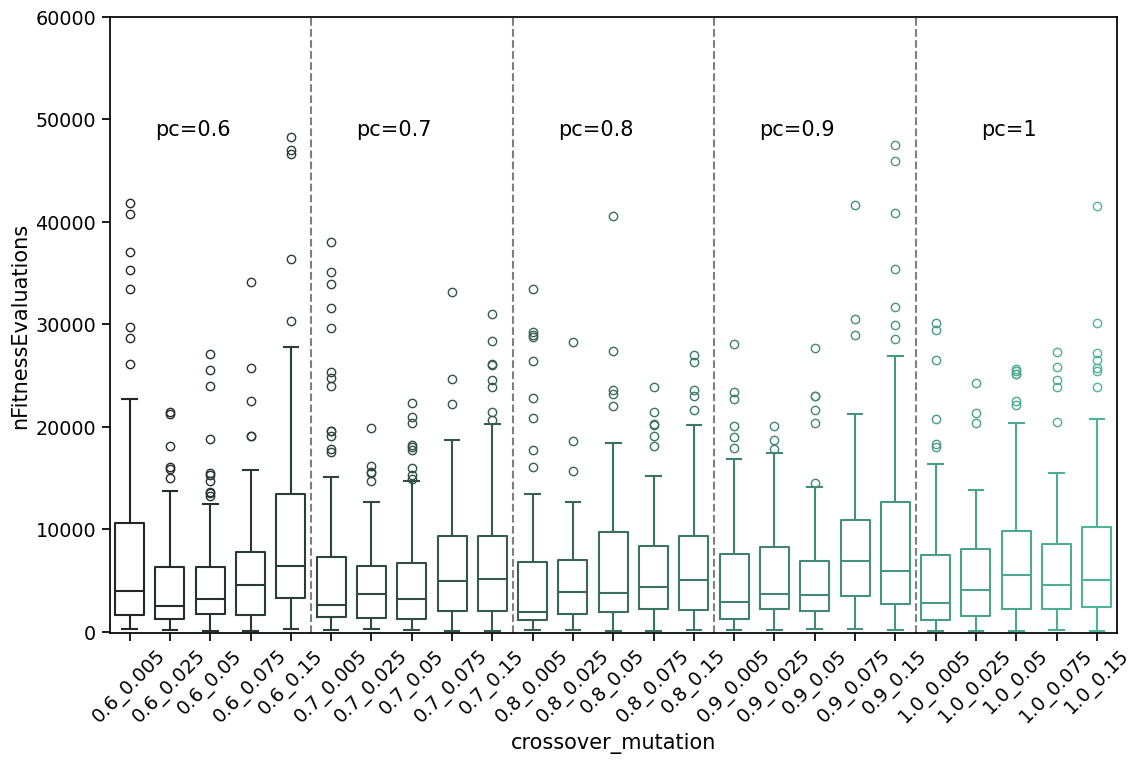

In [11]:
generate_all_plots(data_medium, 50000, "#50B498")

# Big problem

In [12]:
data_big = pd.read_csv("./results/s300_results_solution_found.csv")
data_big["crossover_mutation"] = (
    data_big["crossoverProb"].astype(str) + "_" + data_big["mutationProb"].astype(str)
)

In [13]:
data_big.groupby("crossoverProb").agg(
    {"nFitnessEvaluations": ["mean", "std", "min", "max"]}
)

nFitnessEvaluations                         
                             mean          std  min    max
crossoverProb                                             
0.6                      6277.524  7442.802588  101  69540
0.7                      6598.550  6929.952830  101  58065
0.8                      7080.596  8357.104472  101  85065
0.9                      6831.992  7046.026711  101  50425
1.0                      7024.420  6727.390686  101  43668

In [14]:
data_big.groupby("mutationProb").agg(
    {"nFitnessEvaluations": ["mean", "std", "min", "max"]}
)

nFitnessEvaluations                         
                            mean          std  min    max
mutationProb                                             
0.003333                5352.638  6573.289873  101  47695
0.016667                5383.800  4815.030638  101  31238
0.033333                6301.606  5940.341996  101  45066
0.050000                7797.036  7896.991001  101  50425
0.100000                8978.002  9719.050945  101  85065

/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_320/190913756.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FF2E63'` for the same effect.

  sns.boxplot(
/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_320/190913756.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


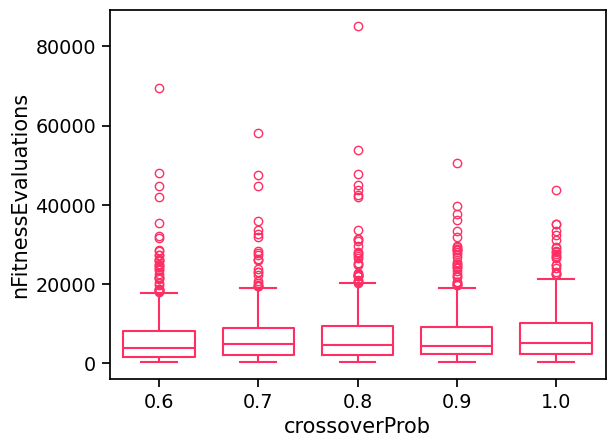

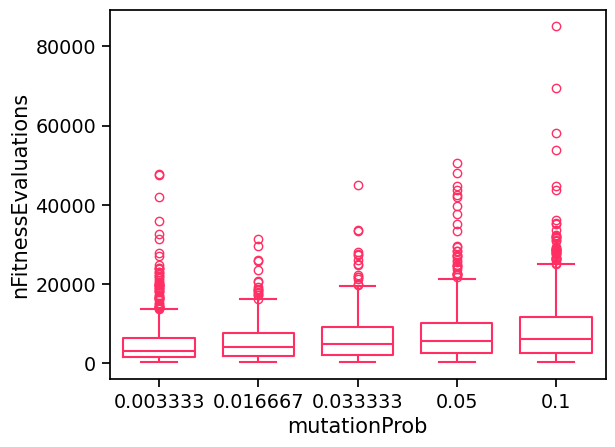

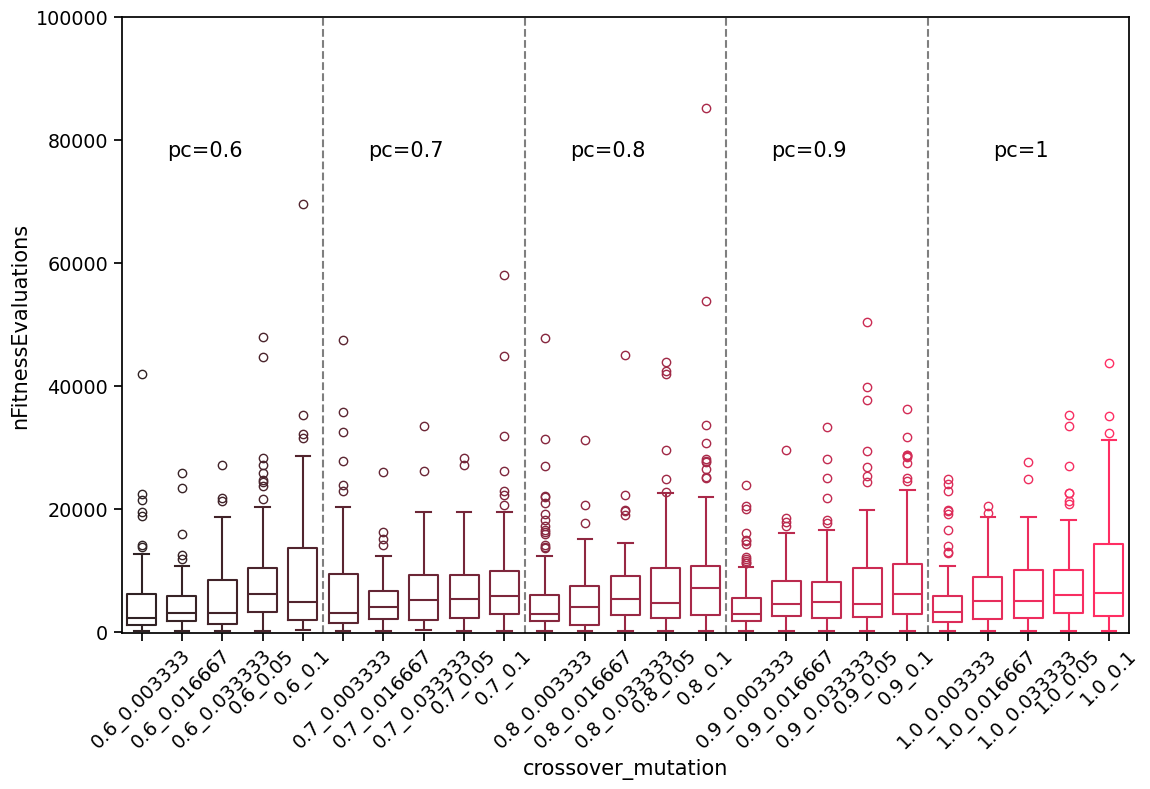

In [15]:
generate_all_plots(data_big, 80000, "#FF2E63")